<a href="https://colab.research.google.com/github/youssefHosni/Time-Series-With-Python/blob/main/Arima%20Models%20in%20Python/ARIMA_Models_In%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. ARMA Models

## 1.1. Introduction to stationarity

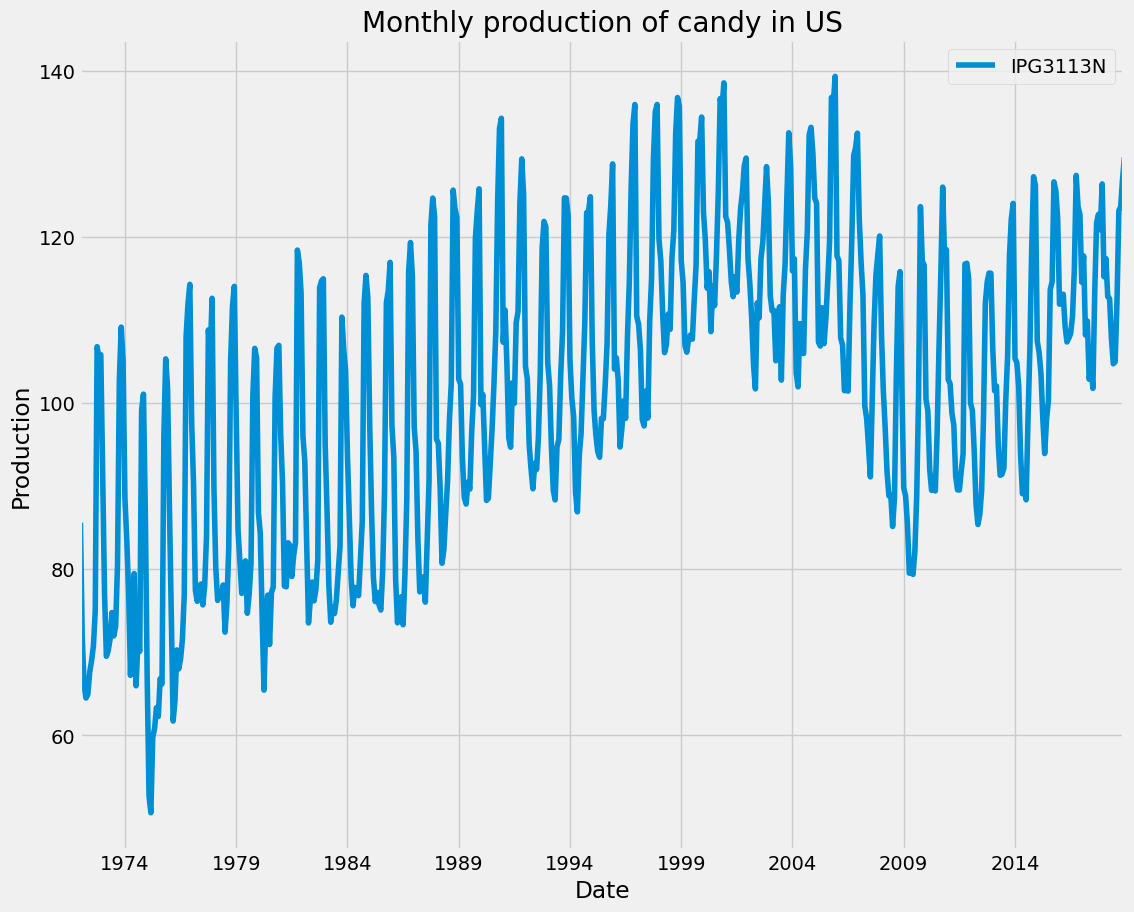

In [3]:
# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)
# change the plot style into fivethirtyeight 
plt.style.use('fivethirtyeight')

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1, figsize=(12,10))
plt.title('Monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()


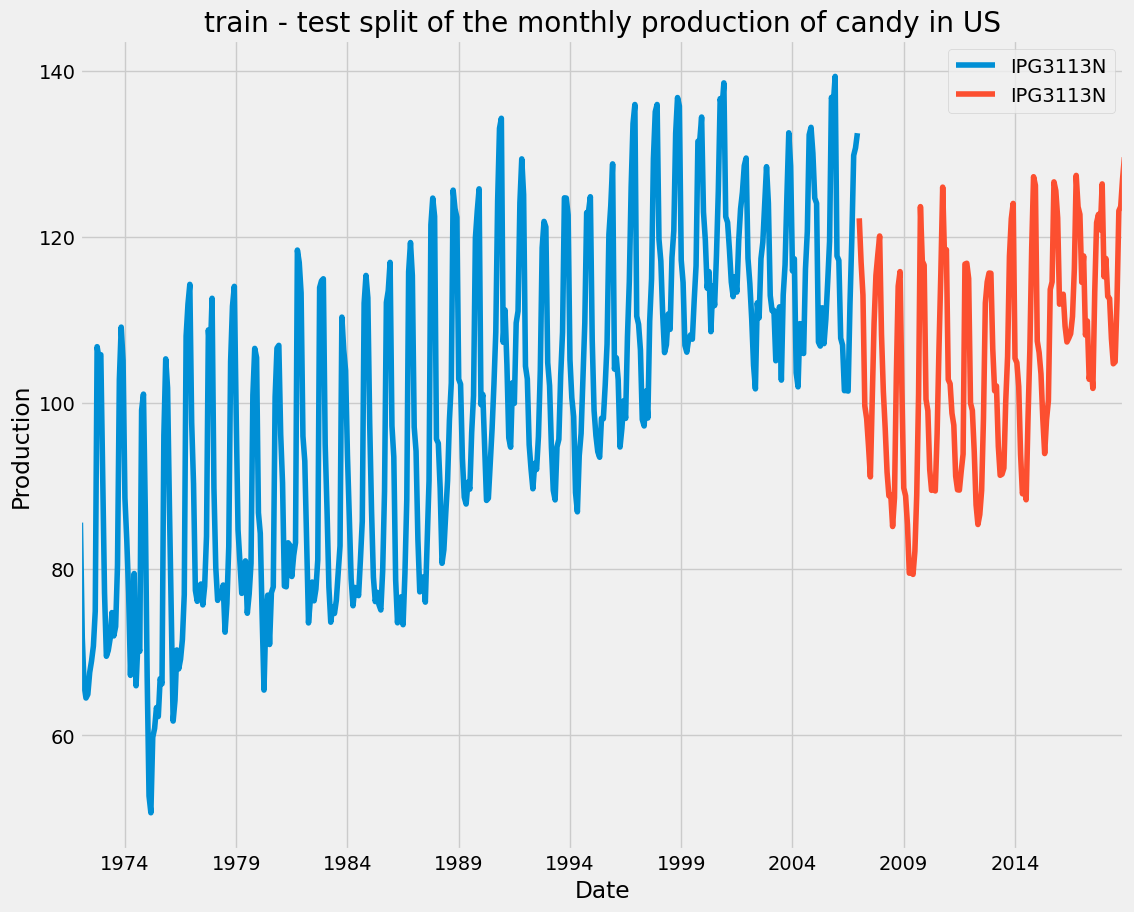

In [4]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax, figsize=(12,10))
candy_test.plot(ax=ax)
plt.title('train - test split of the monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

## 1.2. Making a time series stationary

In [5]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(candy)
print(results)

(-1.7760153075016112, 0.3924327500714, 14, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3094.828881317046)


In [6]:
# Calculate the first difference and drop the nans
candy_diff = candy.diff()
candy_diff = candy_diff.dropna()

# Run test and print
result_diff = adfuller(candy_diff)
print(result_diff)


(-6.175912489755676, 6.631549159334939e-08, 13, 549, {'1%': -3.4423174665535385, '5%': -2.866818952732754, '10%': -2.569581505602171}, 3091.3123583091397)


In [7]:
earthquake = pd.read_csv('earthquakes.csv',
                         index_col='date',
                        parse_dates=True)


In [8]:
# Calculate log-return and drop nans
earthquake_log = np.log(earthquake)
earthquake_log = earthquake_log.dropna()

# Run test and print
result_log = adfuller(earthquake_log['earthquakes_per_year'])
print(result_log)

(-3.4716329087791133, 0.008746217828723079, 1, 97, {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}, 42.37775831722789)


## 1.3. Introduction to AR, MA adn ARMA models

In [9]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar_coefs = [1, -0.5] 
ma_coefs = [1, 0.2]
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

In [10]:
from statsmodels.tsa.arima.model import ARIMA
# Instantiate model object
model = ARIMA(y, order=(1,0,1))
# Fit model
results = model.fit()


# 2. Fitting the Future

## 2.1. Fitting time series models


In [11]:
from statsmodels.tsa.arima.model import ARIMA
# Instantiate model object
model = ARIMA(y, order=(1,0,1))
# Fit model
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -71.530
Date:                Wed, 08 Mar 2023   AIC                            151.060
Time:                        19:43:45   BIC                            161.481
Sample:                             0   HQIC                           155.278
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.122      1.561      0.119      -0.049       0.431
ar.L1          0.4778      0.148      3.219      0.001       0.187       0.769
ma.L1          0.2316      0.171      1.354      0.1

## 2.2. Forecasting 

<AxesSubplot: xlabel='date'>

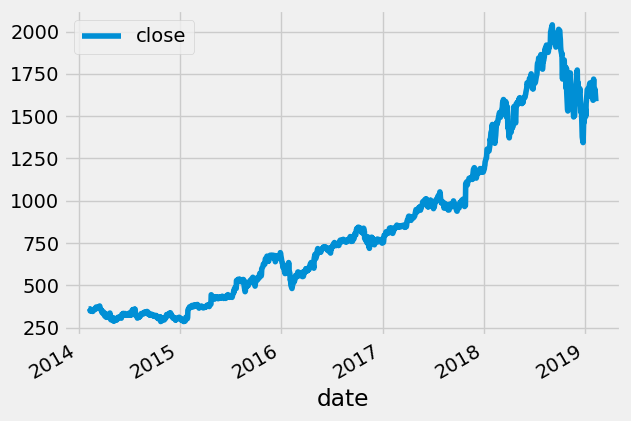

In [12]:
amazon = pd.read_csv('amazon_close.csv',
                     index_col='date',
                     parse_dates=True)
amazon.plot()

In [13]:
results = adfuller(amazon)
print(results)

(-1.34466909653261, 0.6084966311408357, 23, 1235, {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}, 10782.877783880944)


In [14]:
# Instantiate the model
model = ARIMA(amazon, order=(1,1,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5538.450
Date:                Wed, 08 Mar 2023   AIC                          11082.901
Time:                        19:43:55   BIC                          11098.312
Sample:                             0   HQIC                         11088.693
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8065      0.104      7.726      0.000       0.602       1.011
ma.L1         -0.8352      0.099     -8.450      0.000      -1.029      -0.641
sigma2       390.4373      5.974     65.352      0.0

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but 

In [15]:
# Generate predictions
one_step_forecast = results.get_prediction(end=20)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

date
2019-02-08       0.000000
2019-02-07    1588.203390
2019-02-06    1613.657085
2019-02-05    1638.957978
2019-02-04    1657.209111
2019-02-01    1632.688779
2019-01-31    1625.911319
2019-01-30    1715.839389
2019-01-29    1669.391489
2019-01-28    1595.197449
2019-01-25    1637.732122
2019-01-24    1669.502851
2019-01-23    1654.486721
2019-01-22    1640.077085
2019-01-18    1632.442740
2019-01-17    1694.591530
2019-01-16    1691.962059
2019-01-15    1683.000154
2019-01-14    1674.173180
2019-01-11    1618.532405
2019-01-10    1640.994516
Name: predicted_mean, dtype: float64


In [16]:
mean_forecast = mean_forecast[1:]

In [17]:
mean_forecast

date
2019-02-07    1588.203390
2019-02-06    1613.657085
2019-02-05    1638.957978
2019-02-04    1657.209111
2019-02-01    1632.688779
2019-01-31    1625.911319
2019-01-30    1715.839389
2019-01-29    1669.391489
2019-01-28    1595.197449
2019-01-25    1637.732122
2019-01-24    1669.502851
2019-01-23    1654.486721
2019-01-22    1640.077085
2019-01-18    1632.442740
2019-01-17    1694.591530
2019-01-16    1691.962059
2019-01-15    1683.000154
2019-01-14    1674.173180
2019-01-11    1618.532405
2019-01-10    1640.994516
Name: predicted_mean, dtype: float64

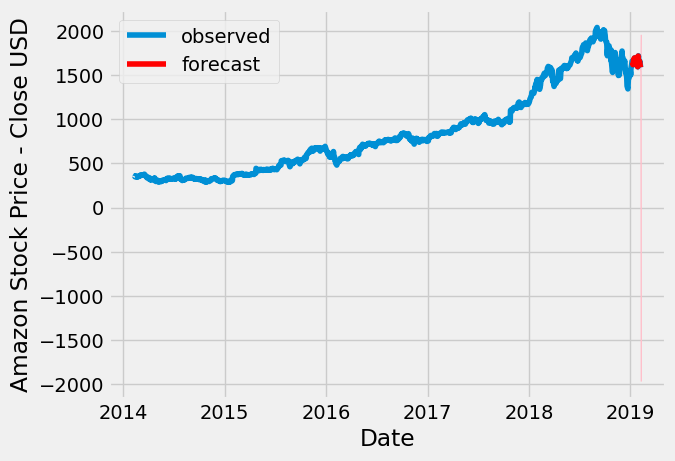

In [18]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index,mean_forecast,color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [19]:
# Generate predictions
dynamic_forecast = results.get_prediction(end= 20, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2019-02-08    0.0
2019-02-07    0.0
2019-02-06    0.0
2019-02-05    0.0
2019-02-04    0.0
2019-02-01    0.0
2019-01-31    0.0
2019-01-30    0.0
2019-01-29    0.0
2019-01-28    0.0
2019-01-25    0.0
2019-01-24    0.0
2019-01-23    0.0
2019-01-22    0.0
2019-01-18    0.0
2019-01-17    0.0
2019-01-16    0.0
2019-01-15    0.0
2019-01-14    0.0
2019-01-11    0.0
2019-01-10    0.0
Name: predicted_mean, dtype: float64


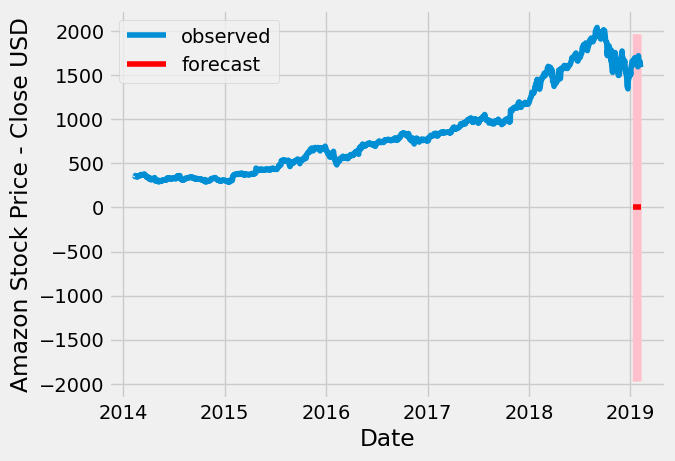

In [20]:
# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

## 2.3. ARIMA models for non-stationary time series

Text(0, 0.5, 'Stock price')

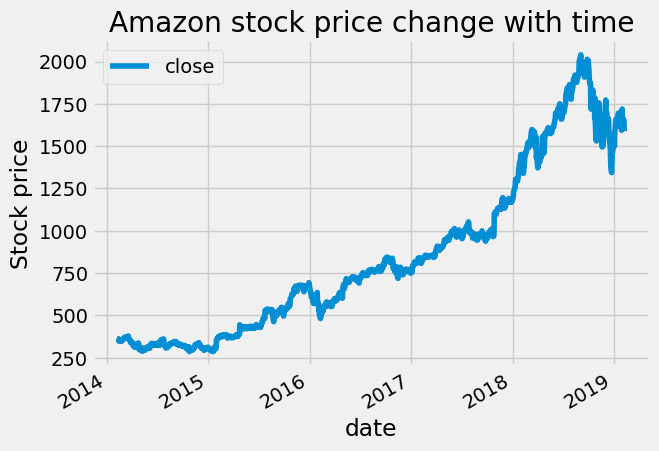

In [21]:
amazon = pd.read_csv('amazon_close.csv',
                     index_col='date',
                     parse_dates=True)
amazon.plot()
plt.title('Amazon stock price change with time')
plt.ylabel('Stock price')

In [22]:
from statsmodels.tsa.stattools import adfuller

# Run Dicky-Fuller test
result = adfuller(amazon)

# Print test statistic
print('The test stastics:', result[0])

# Print p-value
print("The p-value:",result[1])

The test stastics: -1.34466909653261
The p-value: 0.6084966311408357



The data is not stationary and we have to take a tranform of it.

In [23]:
# take the first diff
amazon_diff = amazon.diff()
amazon_diff.dropna(inplace=True)

# Run Dicky-Fuller test
result = adfuller(amazon_diff)

# Print test statistic
print('The test stastics:', result[0])

# Print p-value
print("The p-value:",result[1])

The test stastics: -7.2035794888112425
The p-value: 2.331271725487213e-10


The p-value is less than 0.05, therefore the data is stationary

In [24]:
from statsmodels.tsa.arima.model import ARIMA
# Instantiate model object
model = ARIMA(amazon_diff, order=(1,0,1))
# Fit model
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5536.175
Date:                Wed, 08 Mar 2023   AIC                          11080.350
Time:                        19:44:15   BIC                          11100.900
Sample:                             0   HQIC                         11088.073
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9877      0.457     -2.160      0.031      -1.884      -0.092
ar.L1          0.8267      0.078     10.556      0.000       0.673       0.980
ma.L1         -0.8603      0.072    -11.866      0.0

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but 

In [25]:
from statsmodels.tsa.arima.model import ARIMA
# Instantiate model object
model = ARIMA(amazon, order=(1,1,1))
# Fit model
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5538.450
Date:                Wed, 08 Mar 2023   AIC                          11082.901
Time:                        19:44:17   BIC                          11098.312
Sample:                             0   HQIC                         11088.693
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8065      0.104      7.726      0.000       0.602       1.011
ma.L1         -0.8352      0.099     -8.450      0.000      -1.029      -0.641
sigma2       390.4373      5.974     65.352      0.0

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but 

# 3. Finding the Best Models

## 3.1. Introduction to ACF and PACF

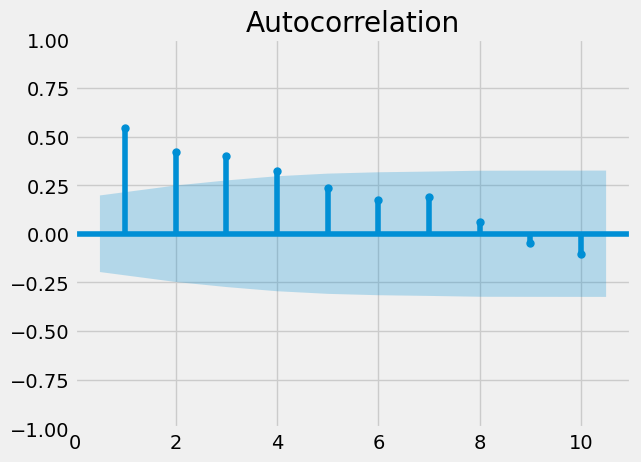

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Make ACF plot
plot_acf(earthquake['earthquakes_per_year'], lags=10, zero=False)
plt.show()

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


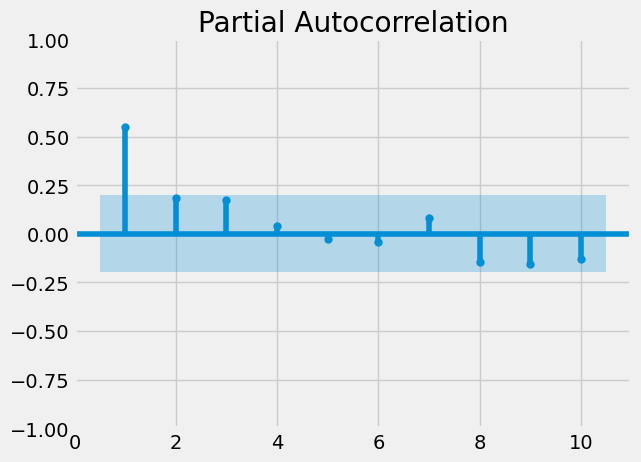

In [27]:
# Make PACF plot
plot_pacf(earthquake['earthquakes_per_year'], lags=10, zero=False)
plt.show()

## 3.2. Intro to AIC and BIC

In [28]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(earthquake['earthquakes_per_year'], order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))            
        except:
            print(p, q, None, None)
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Models sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Models sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Lo

Models sorted by AIC 


   p  q         aic         bic
0  1  1  647.132300  654.917660
1  1  2  648.738566  659.119046
2  2  1  648.842840  659.223319
3  2  2  648.850644  661.826244
4  2  0  656.028374  663.813734
5  1  0  666.645526  671.835765
6  0  2  761.067479  768.852838
7  0  1  799.674173  804.864412
8  0  0  888.429772  891.024892
Models sorted by BIC 


   p  q         aic         bic
0  1  1  647.132300  654.917660
1  1  2  648.738566  659.119046
2  2  1  648.842840  659.223319
3  2  2  648.850644  661.826244
4  2  0  656.028374  663.813734
5  1  0  666.645526  671.835765
6  0  2  761.067479  768.852838
7  0  1  799.674173  804.864412
8  0  0  888.429772  891.024892


C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


## 3.3. The model diagnostic

In [29]:
# The model with the best p and q found from pervious step
model = sm.tsa.statespace.SARIMAX(earthquake['earthquakes_per_year'], order=(1, 0, 1))
# Fit model
results = model.fit()
# Assign residuals to variable
residuals = results.resid
print(residuals)

date
1900-01-01    13.000000
1901-01-01     1.857276
1902-01-01    -5.045721
1903-01-01    -0.527074
1904-01-01     5.821641
                ...    
1994-01-01    -0.589256
1995-01-01     9.835545
1996-01-01     2.694023
1997-01-01    -0.278098
1998-01-01    -3.939243
Length: 99, dtype: float64


C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [30]:
# The mean absolute error
mae = np.mean(np.abs(residuals))
print(mae)

4.7556256695276415


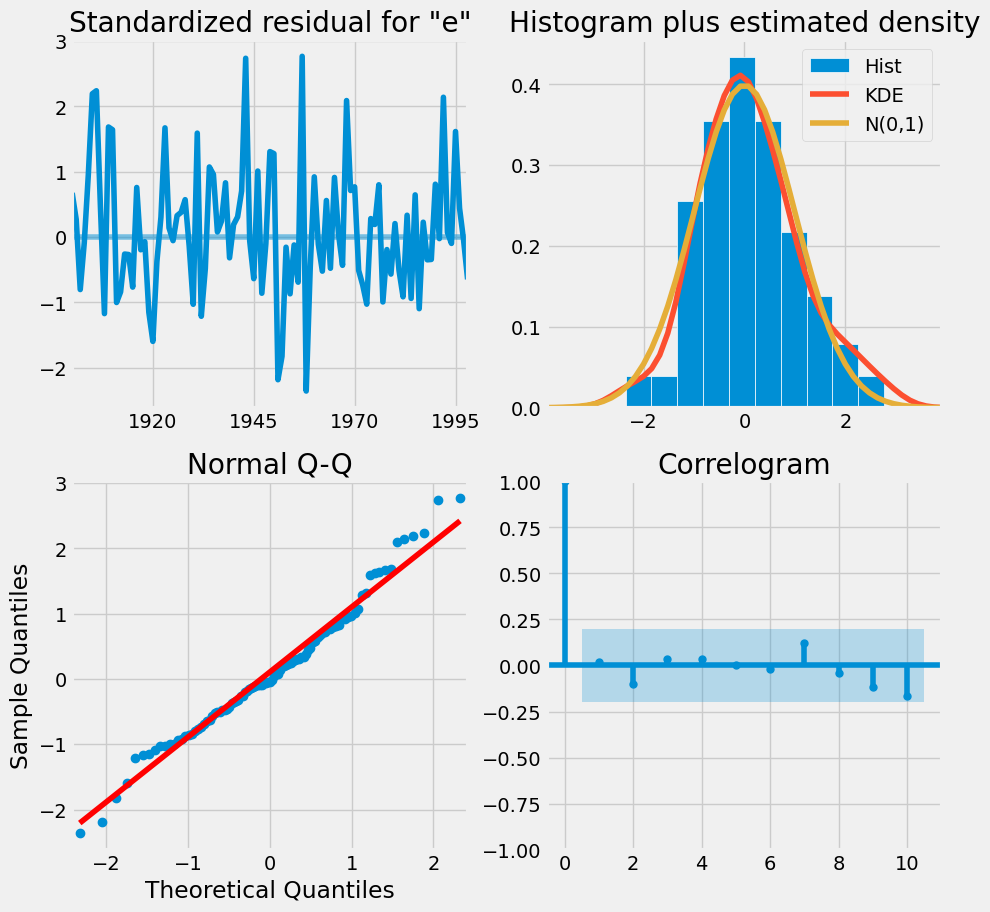

In [31]:
# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(10,10))
plt.show()

In [32]:
# Summary statistics
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -320.566
Date:                  Wed, 08 Mar 2023   AIC                            647.132
Time:                          19:44:42   BIC                            654.918
Sample:                      01-01-1900   HQIC                           650.282
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9893      0.014     70.282      0.000       0.962       1.017
ma.L1         -0.5517      0.089     -6.198      0.000      -0.726      -0.377
sigma2        37.0254      4.980    

# 3.4. The Box-Jenkins method

## Identification 

<AxesSubplot: xlabel='date'>

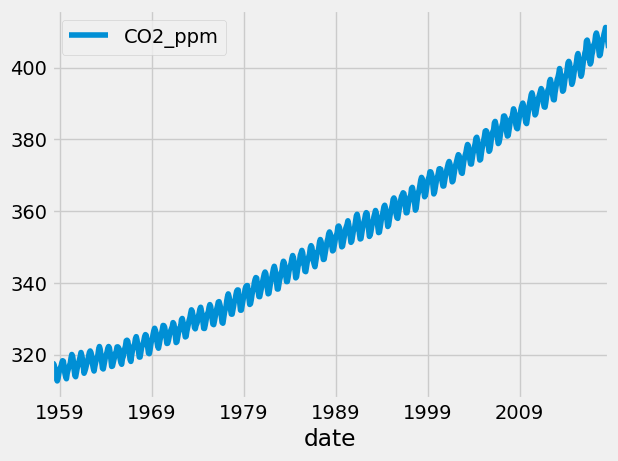

In [33]:
co2 = pd.read_csv('co2.csv',
                     index_col='date',
                     parse_dates=True)
co2.plot()

In [34]:
from statsmodels.tsa.stattools import adfuller

# Run Dicky-Fuller test
result = adfuller(co2)

# Print test statistic
print('The test stastics:', result[0])

# Print p-value
print("The p-value:",result[1])

The test stastics: 4.774866785205469
The p-value: 1.0


The test stastics: -5.287425631615346
The p-value: 5.81378917533024e-06


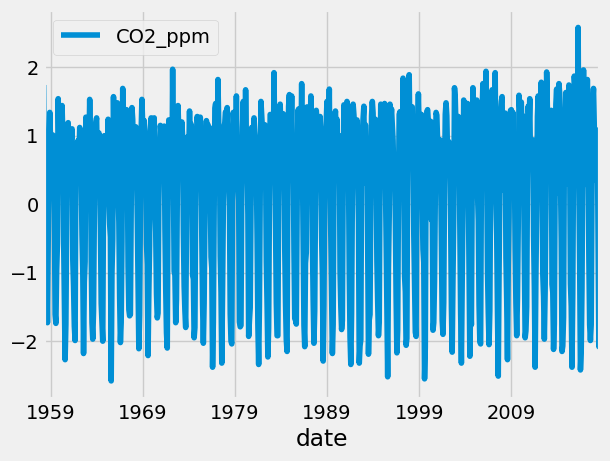

In [35]:
co2_diff = co2.diff()
co2_diff = co2_diff.dropna()
co2_diff.plot()

# Run Dicky-Fuller test
result_diff = adfuller(co2_diff)

# Print test statistic
print('The test stastics:', result_diff[0])

# Print p-value
print("The p-value:",result_diff[1])

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


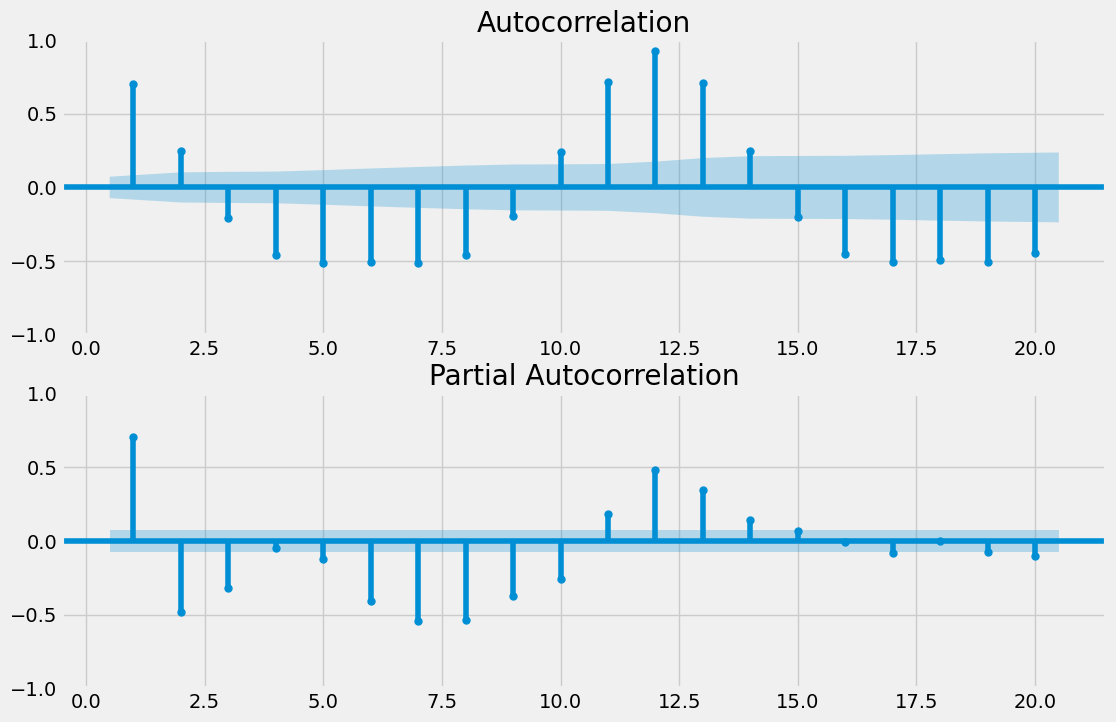

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(co2_diff, lags=20, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(co2_diff, lags=20, zero=False, ax=ax2)

plt.show()

# Estimation 

In [37]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-4
for p in range(5):
    # Loop over q values from 0-4
    for q in range(5):
      
        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(co2, order=(p, 1, q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))            
        except:
            print(p, q, None, None)
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Models sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Models sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Pyt

Models sorted by AIC 


    p  q          aic          bic
0   4  4   924.957651   966.245601
1   2  4  1297.058431  1329.171281
2   3  4  1300.892187  1337.592587
3   2  3  1525.544582  1553.069882
4   2  1  1526.197900  1544.548100
5   3  3  1526.576628  1558.689478
6   4  3  1526.884221  1563.584621
7   2  2  1528.164866  1551.102616
8   3  1  1528.165664  1551.103414
9   3  2  1529.270780  1556.796080
10  1  4  1594.276525  1621.801825
11  4  2  1602.576938  1634.689788
12  3  0  1609.487338  1627.837538
13  4  0  1610.223137  1633.160887
14  4  1  1611.723967  1639.249267
15  0  3  1658.731030  1677.081230
16  0  4  1658.815935  1681.753685
17  1  3  1659.882416  1682.820166
18  2  0  1680.120665  1693.883315
19  1  2  1707.772491  1726.122691
20  0  2  1756.145317  1769.907968
21  1  1  1776.533722  1790.296372
22  1  0  1870.432865  1879.607965
23  0  1  1932.012001  1941.187102
24  0  0  2367.846163  2372.433713
Models sorted by BIC 


    p  q          aic          bic
0   4  

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to

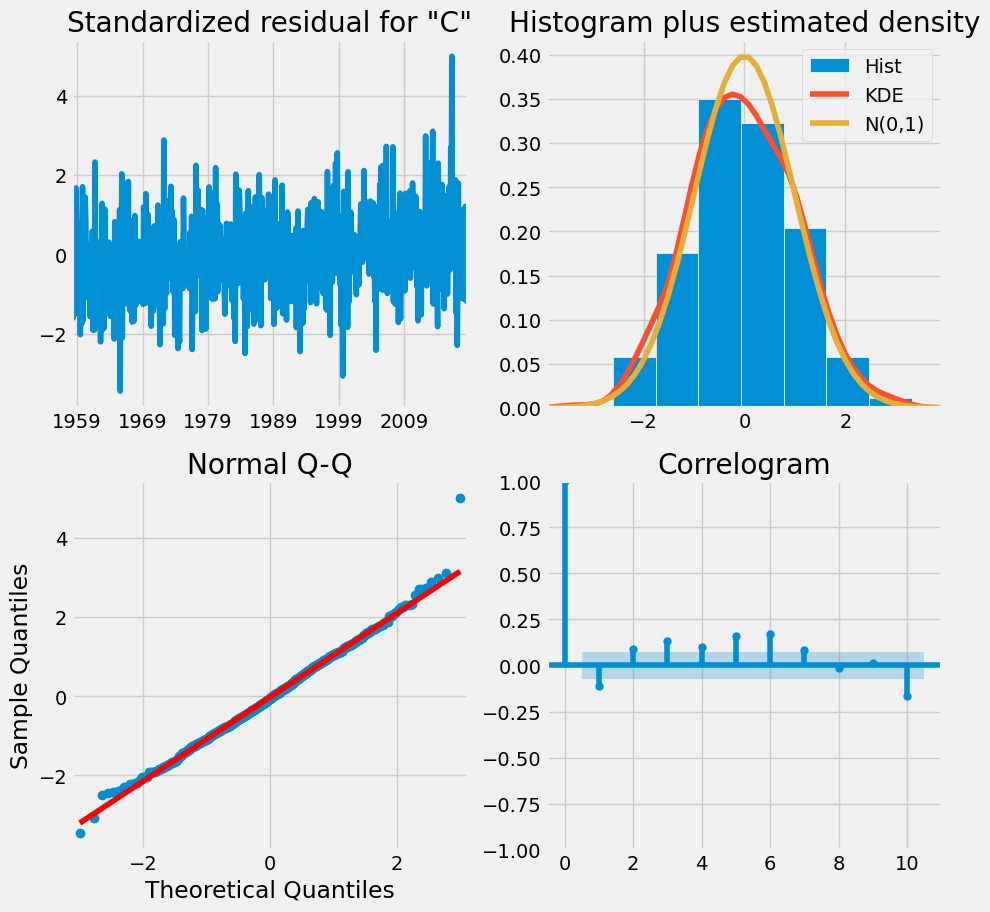

                               SARIMAX Results                                
Dep. Variable:                CO2_ppm   No. Observations:                  727
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -450.078
Date:                Wed, 08 Mar 2023   AIC                            920.156
Time:                        19:45:11   BIC                            966.031
Sample:                    03-01-1958   HQIC                           937.860
                         - 09-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0337      0.002     19.545      0.000       0.030       0.037
ar.L1          2.6609      0.029     92.175      0.000       2.604       2.717
ar.L2         -3.4837      0.062    -56.109      0.0

In [38]:
# Create and fit model
model = sm.tsa.statespace.SARIMAX(co2, order=(4,1,4), trend='c')
results = model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(10,10))
plt.show()

# Print summary
print(results.summary())

# 4. Seasonal ARIMA Models

## 4.1. Seasonal time series

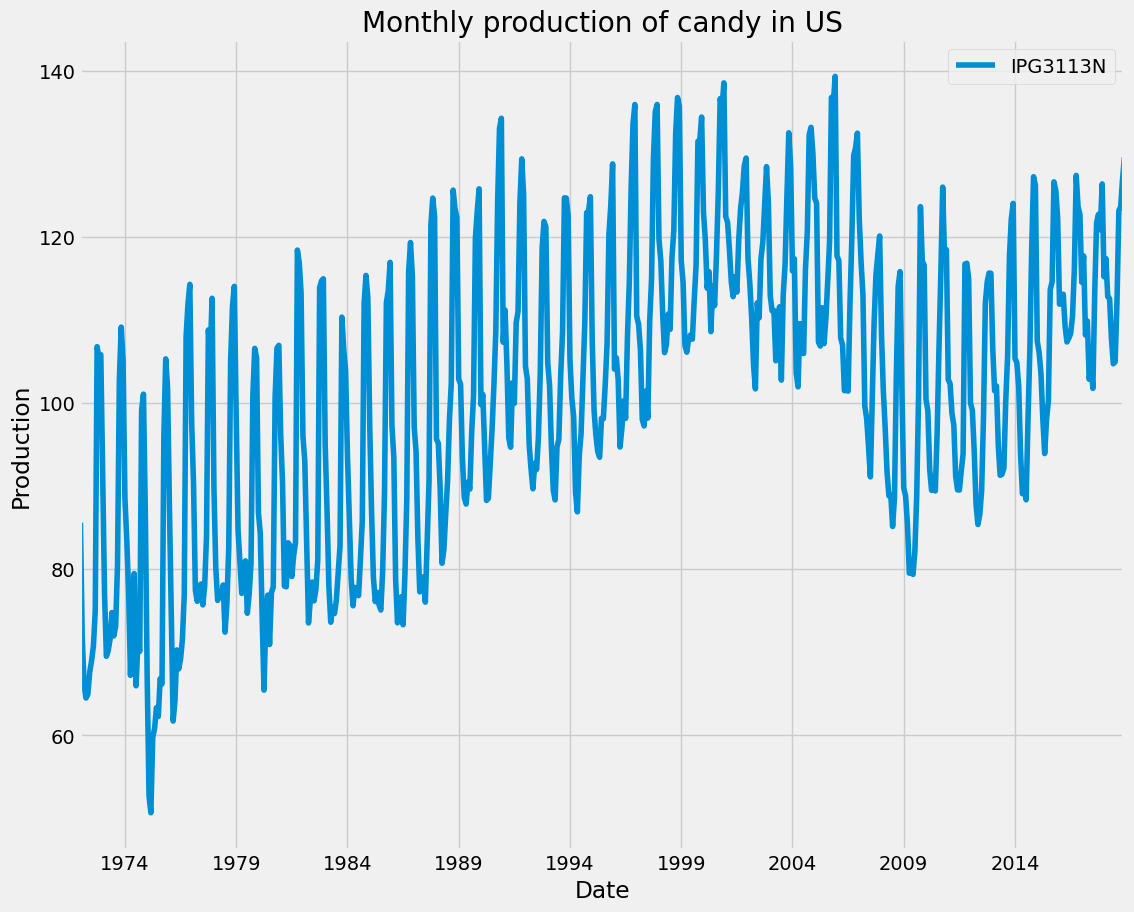

In [39]:
# load the candy production data
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1, figsize=(12,10))
plt.title('Monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

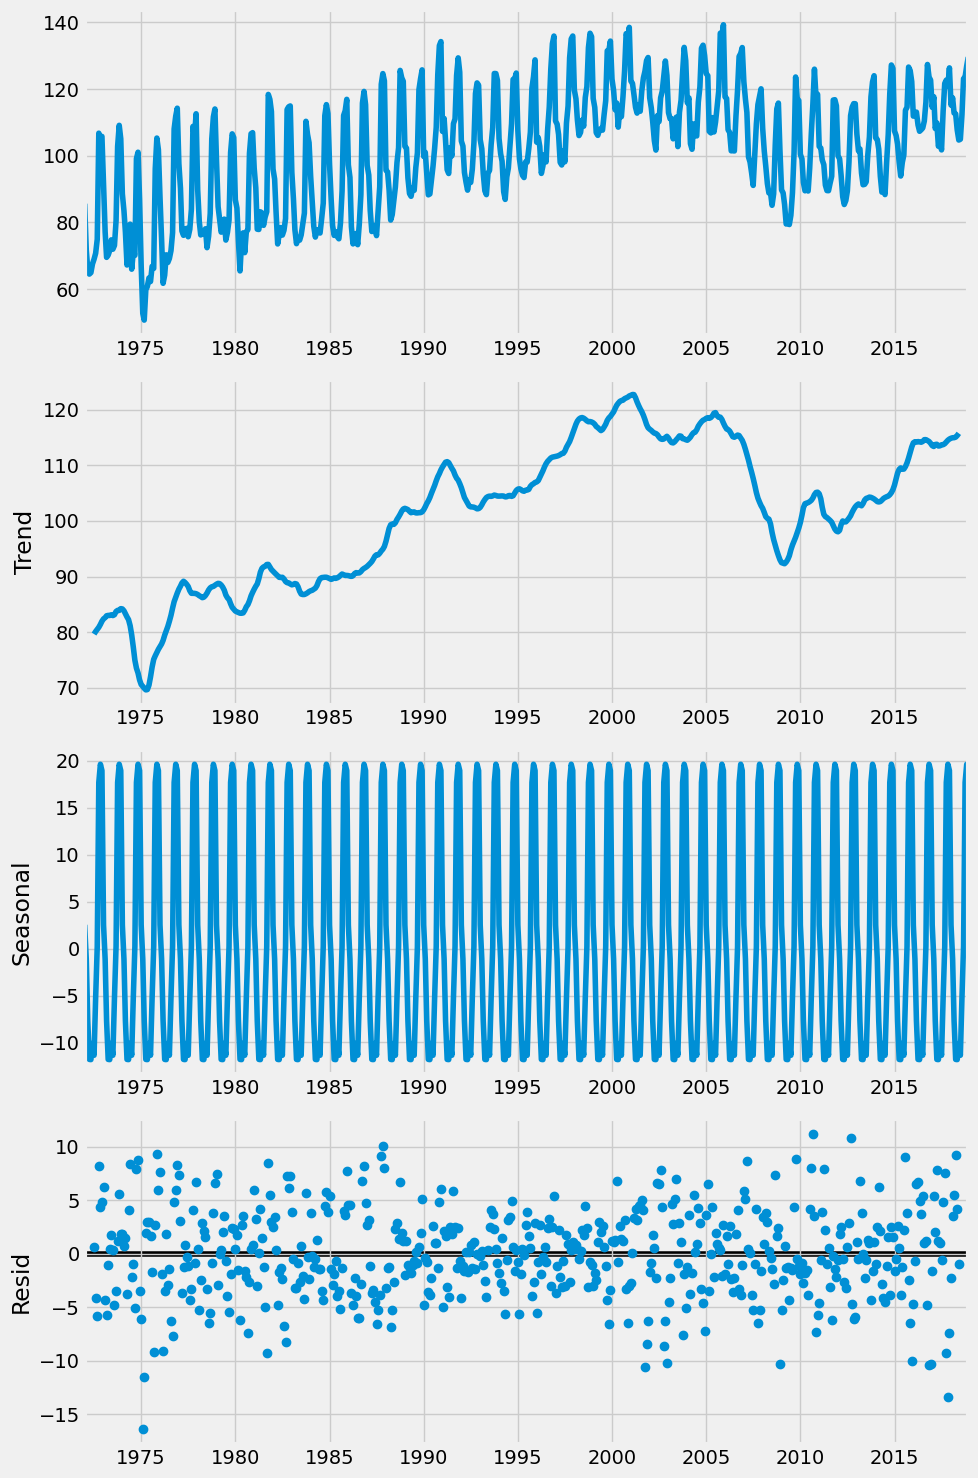

In [40]:
# Import
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose data
decomp_results = seasonal_decompose(candy, period=12)

# Plot decomposed data
plt.rcParams["figure.figsize"] = (10,15)
decomp_results.plot()
plt.show()

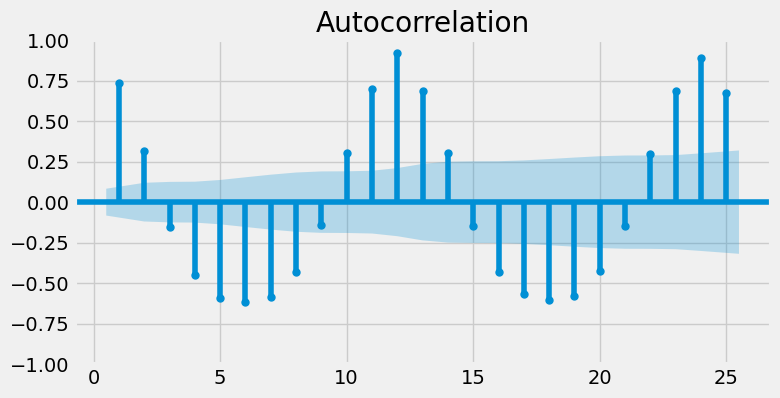

In [41]:
# Subtract long rolling average over 5 steps
candy = candy - candy.rolling(5).mean()
# Drop NaN values
candy = candy.dropna()

# Identifying seasonal data using ACF

# Create figure
fig, ax = plt.subplots(1,1, figsize=(8,4))
# Plot ACF
plot_acf(candy.dropna(), ax=ax, lags=25, zero=False)
plt.show()

## 4.2. Seasonal ARIMA model

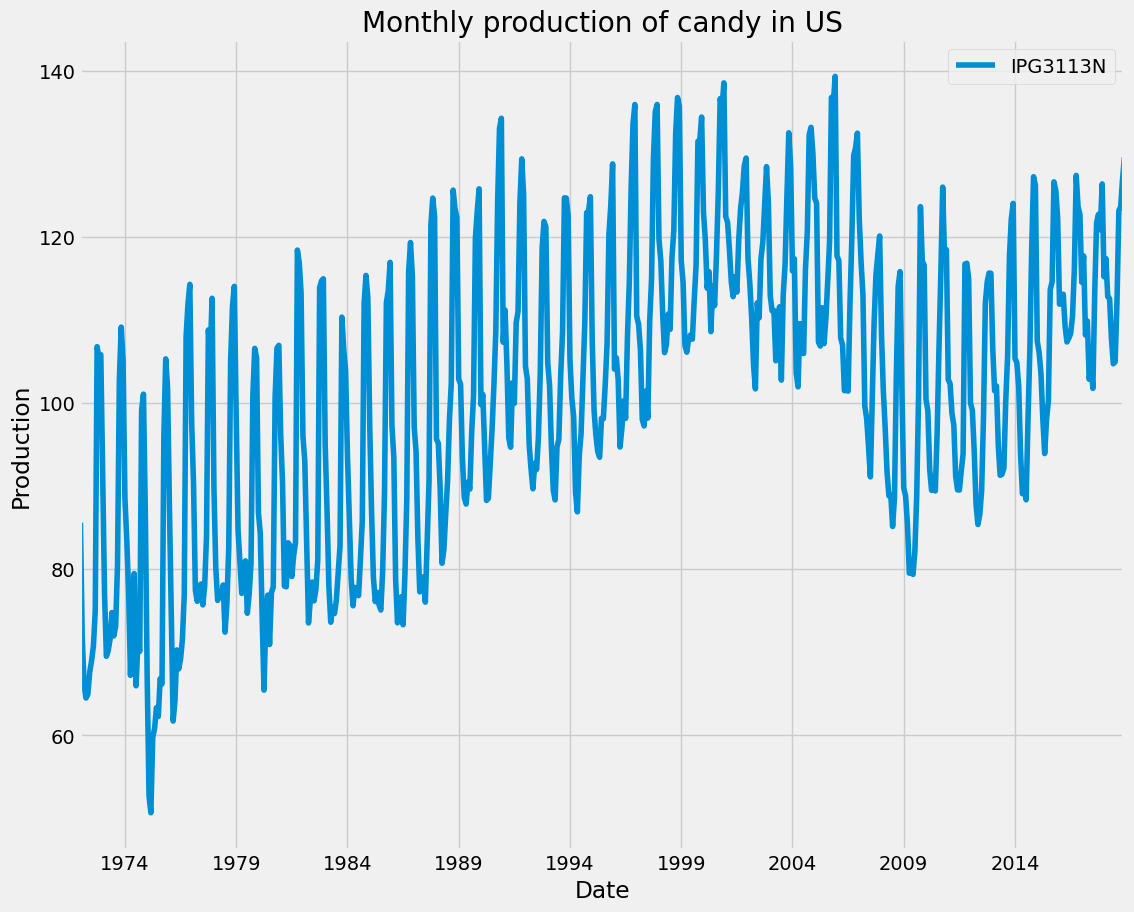

In [42]:
# load the candy production data
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1, figsize=(12,10))
plt.title('Monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

<AxesSubplot: xlabel='date'>

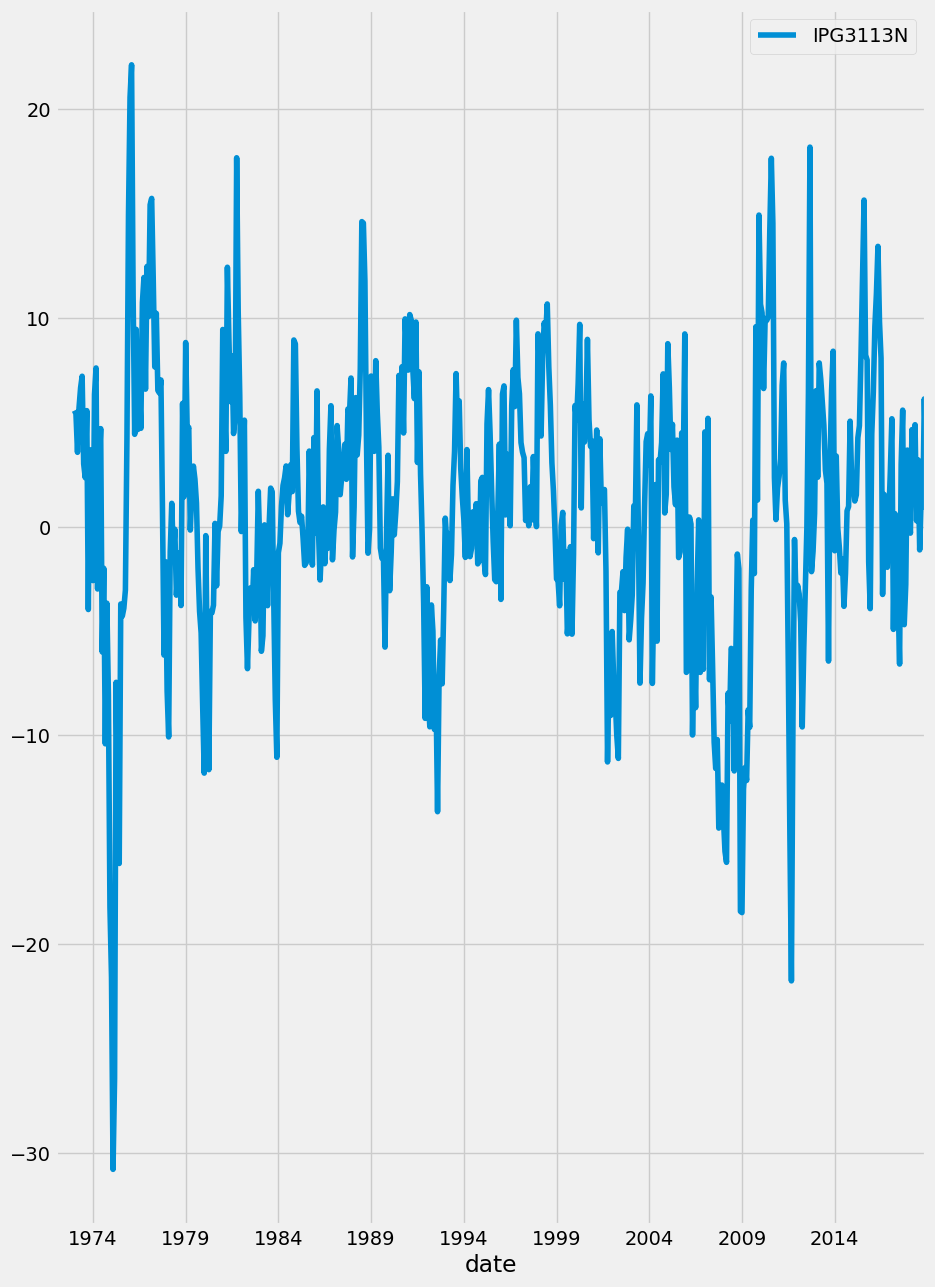

In [43]:
# Seasonal differencing
S = 12
candy_diff = candy.diff(S)
candy_diff.plot()

<AxesSubplot: xlabel='date'>

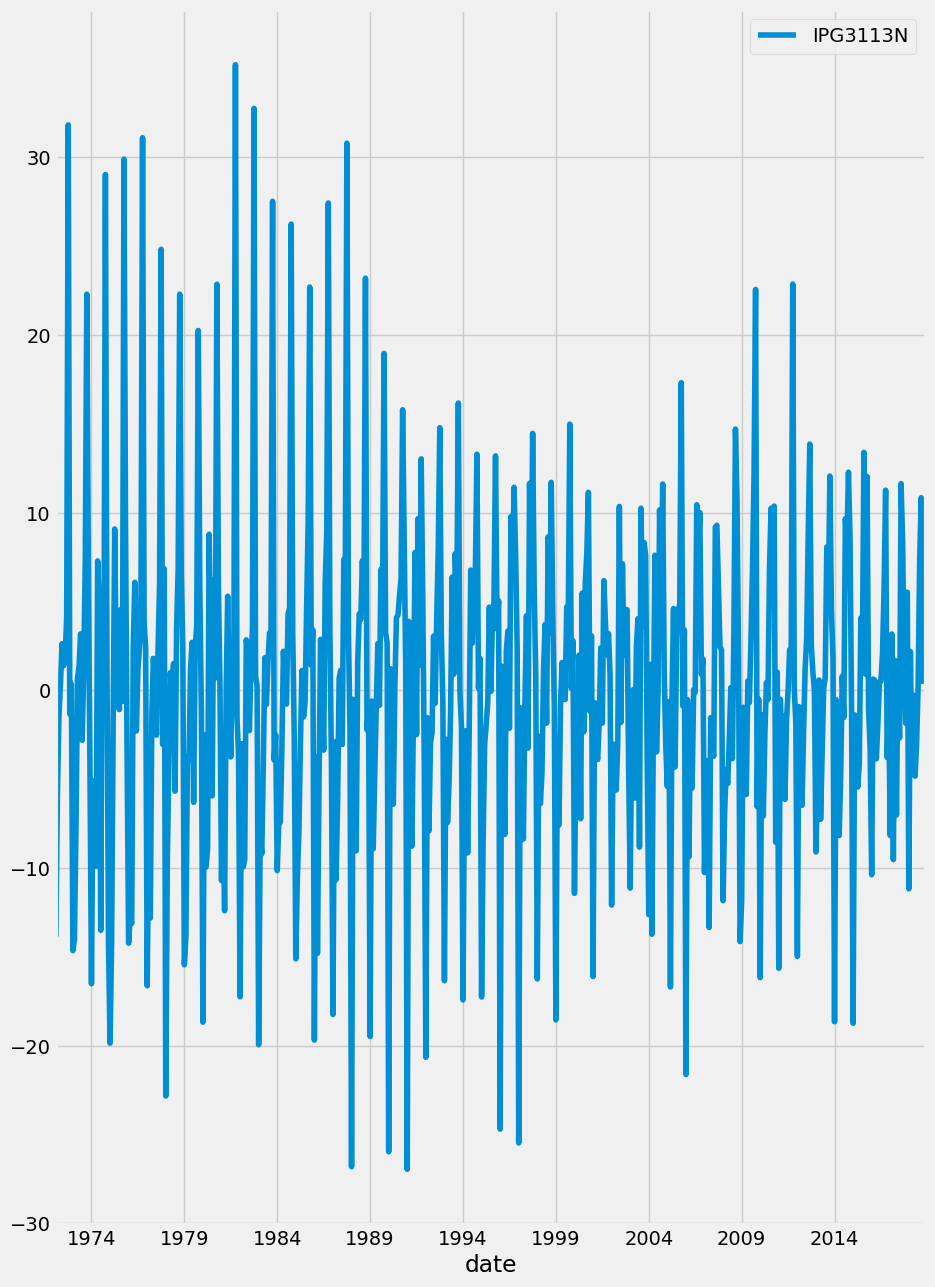

In [44]:
# one step differencing
candy_diff = candy.diff()
candy_diff = candy_diff.dropna()
candy_diff.plot()

In [45]:
# Run Dicky-Fuller test
result = adfuller(candy_diff)

# Print test statistic
print('The test stastics:', result[0])

# Print p-value
print("The p-value:",result[1])


The test stastics: -6.175912489755676
The p-value: 6.631549159334939e-08


C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


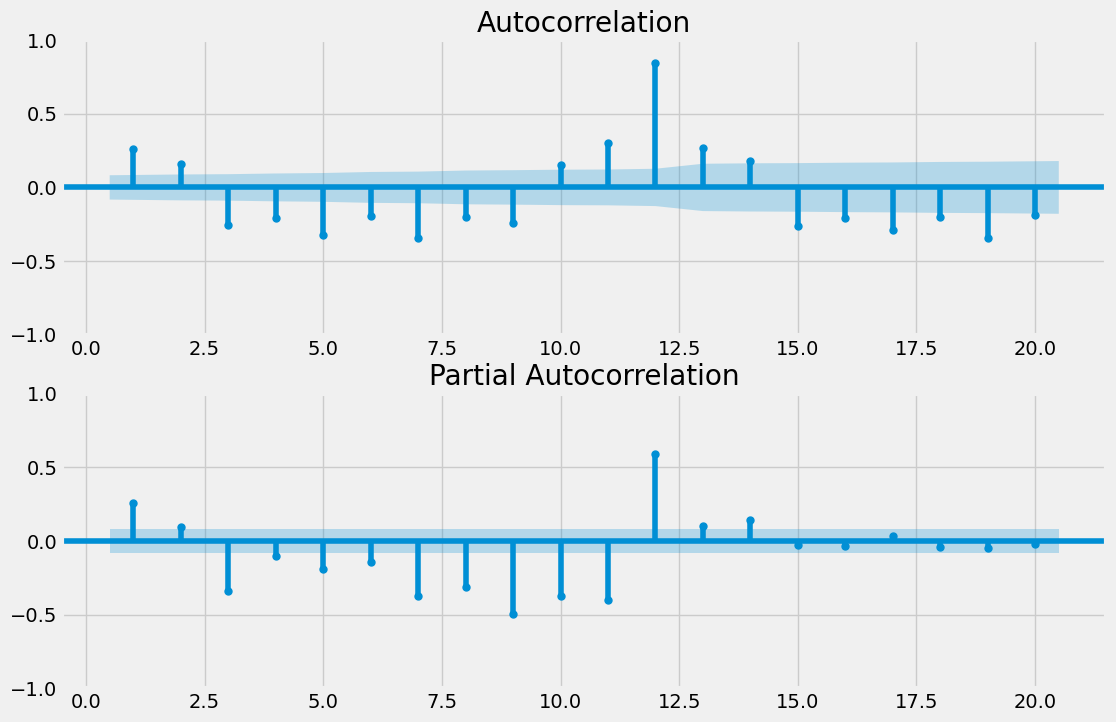

In [46]:
# find the non-seasonal model prameters 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of savings on ax1
plot_acf(candy_diff, lags=20, zero=False, ax=ax1)

# Plot the PACF of savings on ax2
plot_pacf(candy_diff, lags=20, zero=False, ax=ax2)

plt.show()

We cannot estimate the values of the non-seasonal from the PACF and ACF plot, so we will use AIC and BIC

In [47]:
import statsmodels.api as sm
order_aic_bic =[]

# Loop over p values from 0-4
for p in range(5):
    # Loop over q values from 0-4
    for q in range(5):
      
        try:
            # create and fit ARMA(p,q) model
            model = sm.tsa.statespace.SARIMAX(candy_diff, order=(p, 1, q))
            results = model.fit()
            
            # Print order and results
            order_aic_bic.append((p, q, results.aic, results.bic))            
        except:
            print(p, q, None, None)
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic','bic'])

# lets sort them by AIC and BIC

# Sort by AIC
print("Models sorted by AIC ")
print("\n")
print(order_df.sort_values('aic').reset_index(drop=True))

# Sort by BIC
print("Models sorted by BIC ")
print("\n")
print(order_df.sort_values('bic').reset_index(drop=True))

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Pyt

Models sorted by AIC 


    p  q          aic          bic
0   4  3  3763.241828  3797.893843
1   3  3  3790.184356  3820.504869
2   3  2  3828.004963  3853.993974
3   3  4  3859.990202  3894.642217
4   4  2  3906.153917  3936.474430
5   4  4  3915.921857  3954.905374
6   1  4  3924.795150  3950.784161
7   2  3  3928.222338  3954.211349
8   2  2  3929.496813  3951.154322
9   1  3  3933.187639  3954.845149
10  4  1  3956.499987  3982.488999
11  3  1  3959.913291  3981.570801
12  2  4  3983.082086  4013.402599
13  0  4  3989.834299  4011.491808
14  0  3  3992.917578  4010.243585
15  2  1  4027.122665  4044.448673
16  0  2  4041.131179  4054.125685
17  0  1  4068.134320  4076.797324
18  1  2  4079.301579  4096.627587
19  4  0  4121.805669  4143.463178
20  3  0  4132.107316  4149.433323
21  1  1  4163.968651  4176.963157
22  1  0  4166.429943  4175.092946
23  2  0  4167.954663  4180.949169
24  0  0  4279.442303  4283.773804
Models sorted by BIC 


    p  q          aic          bic
0   4  

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The best prameters to be used is (4,3)

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


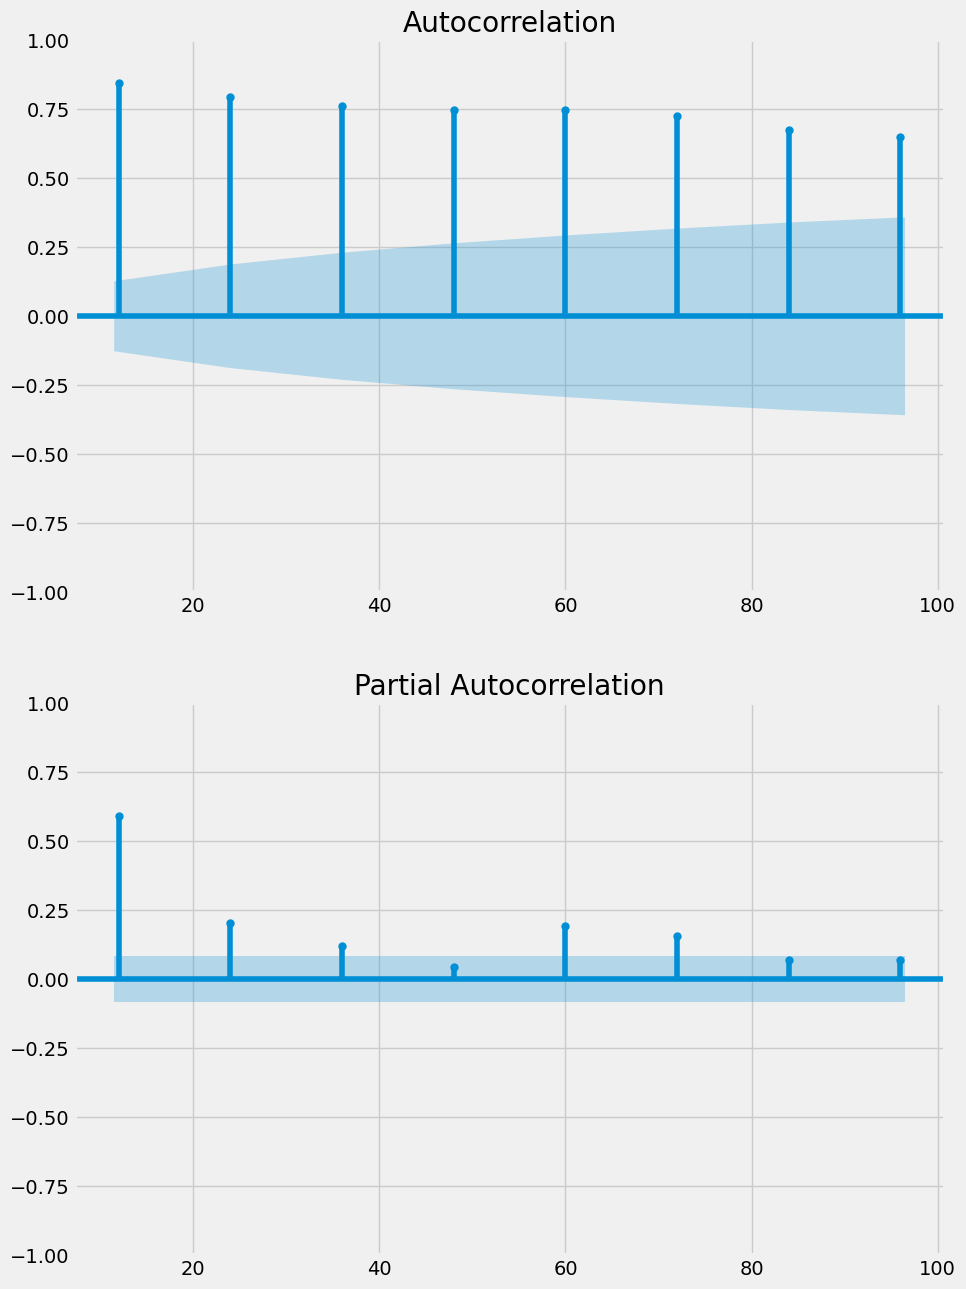

In [48]:
# Plotting seasonal ACF and PACF

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)

# Plot seasonal ACF
plot_acf(candy_diff, lags=[12,24,36,48,60,72, 84, 96 ], ax=ax1)

# Plot seasonal PACF
plot_pacf(candy_diff, lags=[12,24,36,48,60,72, 84, 96], ax=ax2)
plt.show()

ACF tails offf and PACF cuts off after lag of 3

In [49]:
# Fitting a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate model
S = 12
D = 1
d = 1
P = 0
Q = 3
p = 4
q = 3
model = SARIMAX(candy, order=(p,d,q), seasonal_order=(P,D,Q,S))

# Fit model
results = model.fit()

C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Leobardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 4.3. Automation and saving

In [50]:
# Searching over model orders
import pmdarima as pm

results = pm.auto_arima(candy)
print(results)
print(results.summary())
results.plot_diagnostics()

ModuleNotFoundError: No module named 'pmdarima'

In [51]:
# Seasonal search parameters

results = pm.auto_arima(candy, # data
                        seasonal=True, # is the time series seasonal
                        m=12, # the seasonal period
                        D=1, # seasonal difference order
                        start_P=1, # initial guess for P
                        start_Q=1, # initial guess for Q
                        max_P=4, # max value of P to test
                        max_Q=4, # max value of Q to test
                        information_criterion='aic', # used to select best model
                        trace=True, # print results whilst training
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True,
                       )
print(results)
print(results.summary())
results.plot_diagnostics()

NameError: name 'pm' is not defined

In [52]:
#Saving model objects
# Import joblib
import joblib
# Select a filepath
filepath = 'model.pkl'
# Save model to filepath
joblib.dump(results, filepath)

# Load the model 
# Select a filepath
filepath ='model.pkl'
# Load model object from filepath
loaded_model = joblib.load(filepath)

## 4.4. SARIMA and Box-Jenkins